In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Jerk-minimizing Trajectory Generator

In [2]:
def generateJMT(x0, x0_d, x0_dd, xf, xf_d, xf_dd, t):
    t2 =  t*t
    t3 = t2*t
    t4 = t3*t
    t5 = t4*t
    
    A = np.array([[    t3,     t4,      t5],
                  [3.0*t2, 4.0*t3,  5.0*t4,],
                  [6.0*t, 12.0*t2, 20.0*t3]])
    b = np.array([[xf - (x0 + x0_d*t + 0.5*x0_dd*t2)],
                  [xf_d - (x0_d + x0_dd*t)],
                  [xf_dd - (x0_dd)]])
                  
    a3a4a5 = np.linalg.solve(A, b)
                  
    coeffs = [x0, x0_d, 0.5*x0_dd, a3a4a5[0], a3a4a5[1], a3a4a5[2]]
    
    return coeffs

In [3]:
def generateJMT4(x0, x0_d, x0_dd, xf_d, xf_dd, t):
    t2 =  t*t
    t3 = t2*t
    
    A = np.array([[3.0*t2, 4.0*t3],
                  [6.0*t, 12.0*t2]])
    
    b = np.array([[xf_d - (x0_d + x0_dd*t)],
                  [xf_dd - (x0_dd)]])
                  
    a3a4 = np.linalg.solve(A, b)
                  
    coeffs = [x0, x0_d, 0.5*x0_dd, a3a4[0], a3a4[1]]
    
    return coeffs

In [4]:
def generateJMT2(x0, x0_d, xf_d, t):
    coeffs = [x0, x0_d, (xf_d - x0_d)/(2.0 *  t)]
    
    return coeffs

In [5]:
def evaluate_polynomial(coeffs, x):
    output = 0.0
    
    for i in range(len(coeffs)):
        output += coeffs[i] * (x**i)
    return output

In [6]:
def differentiate_polynomial(coeffs):
    output = []
    
    for i in range(1, len(coeffs)):
        output.append(coeffs[i] * i)
        
    return output

In [7]:
def visualize_polynomial(coeffs, t, N):
    x = np.linspace(0, t, N)
    y = [evaluate_polynomial(coeffs, x_i) for x_i in x]
    
    plt.plot(x, y)

### Example

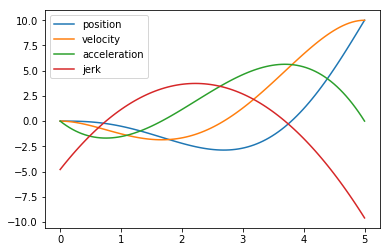

In [8]:
x0 = 0.0
x0_d = 0.0
x0_dd = 0.0

xf = 10.0
xf_d = 10.0
xf_dd = 0.0

t = 5

coeffs_position = generateJMT(x0, x0_d, x0_dd, xf, xf_d, xf_dd, t)
coeffs_velocity = differentiate_polynomial(coeffs_position)
coeffs_acc = differentiate_polynomial(coeffs_velocity)
coeffs_jerk = differentiate_polynomial(coeffs_acc)

plt.figure()

visualize_polynomial(coeffs_position, t, 100)
visualize_polynomial(coeffs_velocity, t, 100)
visualize_polynomial(coeffs_acc, t, 100)
visualize_polynomial(coeffs_jerk, t, 100)

plt.legend(['position', 'velocity', 'acceleration', 'jerk'])
plt.show()

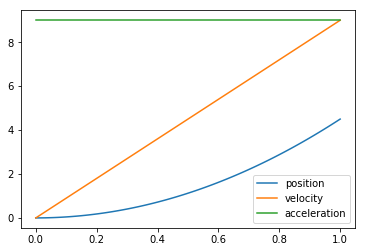

In [9]:
x0 = 0.0
x0_d = 0.0
x0_dd = 0.0

xf_d = 9.5
xf_dd = 0.0

t = 1

coeffs_position = [0, 0, 4.5] #generateJMT2(x0, x0_d, xf_d,t)
coeffs_velocity = differentiate_polynomial(coeffs_position)
coeffs_acc = differentiate_polynomial(coeffs_velocity)
coeffs_jerk = differentiate_polynomial(coeffs_acc)

plt.figure()

visualize_polynomial(coeffs_position, t, 100)
visualize_polynomial(coeffs_velocity, t, 100)
visualize_polynomial(coeffs_acc, t, 100)
#visualize_polynomial(coeffs_jerk, t, 100)

plt.legend(['position', 'velocity', 'acceleration', 'jerk'])
plt.show()

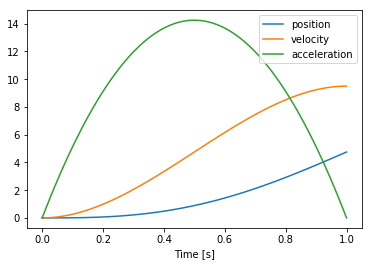

9.5

In [10]:
t = 1

coeffs_position = [0, 0, 0, 9.5, -4.75]
coeffs_velocity = differentiate_polynomial(coeffs_position)
coeffs_acc = differentiate_polynomial(coeffs_velocity)
coeffs_jerk = differentiate_polynomial(coeffs_acc)

plt.figure()

visualize_polynomial(coeffs_position, t, 100)
visualize_polynomial(coeffs_velocity, t, 100)
visualize_polynomial(coeffs_acc, t, 100)
#visualize_polynomial(coeffs_jerk, t, 100)

plt.legend(['position', 'velocity', 'acceleration', 'jerk'])
plt.xlabel('Time [s]')
plt.show()

evaluate_polynomial(coeffs_velocity, t)

### Lateral motion test

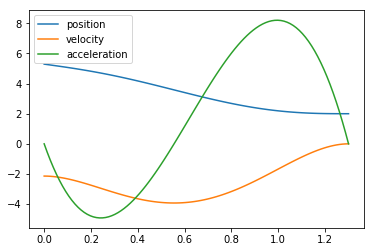

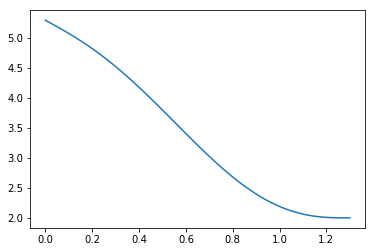

In [26]:
x0    = 6.0
x0_d  = 0.0
x0_dd = 0.0

xf    = 2.0
xf_d  = 0.0
xf_dd = 0.0

t = 1.5 - 10*0.02

#coeffs_position = generateJMT(x0, x0_d, x0_dd, xf, xf_d, xf_dd, t)
coeffs_position = [5.2932,-2.1412,0,-7.38764,9.49881,-3.07265]

coeffs_velocity = differentiate_polynomial(coeffs_position)
coeffs_acc = differentiate_polynomial(coeffs_velocity)
coeffs_jerk = differentiate_polynomial(coeffs_acc)

plt.figure()

visualize_polynomial(coeffs_position, t, 100)
visualize_polynomial(coeffs_velocity, t, 100)
visualize_polynomial(coeffs_acc, t, 100)
plt.legend(['position', 'velocity', 'acceleration'])
plt.show()

evaluate_polynomial(coeffs_position, t)

plt.figure()
visualize_polynomial(coeffs_position, t, 100)
plt.show()